#1) Importando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
plt.rcParams['text.usetex'] = False

In [9]:
import pandas as pd
import numpy as np

# Carrega os dados
minimo_infectados = pd.read_csv('Data.csv', header=None)
column_names = ['Population', 'Basic Reprodution Number', 'Removal Rate', 'Immunity loss rate',
                'Vaccines Number (Normalized)', 'Vaccination begin time', 'Vaccination Rate',
                'Minimum number of infected']
minimo_infectados.columns = column_names

# Calcula o log da população (proteção contra log(0) também pode ser feita se necessário)
minimo_infectados['Population (log)'] = np.log10(minimo_infectados['Population'].replace(0, np.nan))

# Proteção contra população zero (evita divisão por zero)
pop = minimo_infectados['Population'].replace(0, np.nan)

# Calcula a probabilidade de extinção com segurança
minimo_infectados['Extinction Probability'] = np.where(
    minimo_infectados['Minimum number of infected'] > 1 / pop,
    0,
    1 - minimo_infectados['Minimum number of infected'] * pop
)

# (Opcional) Remove a coluna original da população
minimo_infectados = minimo_infectados.drop(columns=['Population'])


,Basic Reprodution Number,Removal Rate,Immunity loss rate,Vaccines Number (Normalized),Vaccination begin time,Vaccination Rate,Minimum number of infected,Population (log),Extinction Probability
0,1,0.05,0.01,0.3,80,0.01,2.219827e-05,4.0,0.778017
1,1,0.05,0.01,0.3,80,0.04,2.223723e-05,4.0,0.777628
2,1,0.05,0.01,0.3,80,0.07,2.218646e-05,4.0,0.778135
3,1,0.05,0.01,0.3,80,0.10,2.235733e-05,4.0,0.776427
4,1,0.05,0.01,0.3,100,0.01,2.220145e-05,4.0,0.777986
...,...,...,...,...,...,...,...,...,...
322555,15,0.20,0.10,1.5,100,0.08,1.000000e-07,7.0,0.000000
322556,15,0.20,0.10,1.5,120,0.07,1.000000e-07,7.0,0.000000
322557,15,0.20,0.10,1.5,120,0.08,1.000000e-07,7.0,0.000000
322558,15,0.20,0.10,1.5,140,0.07,1.000000e-07,7.0,0.000000


[[0.78163694 0.77999282 0.7797111  0.77969813]
 [0.13402043 0.10518128 0.08553885 0.06905136]
 [0.16838776 0.13757967 0.1150765  0.09802604]
 [0.19109994 0.16193834 0.13954297 0.11967725]
 [0.20542283 0.17967402 0.15751841 0.13948004]
 [0.22050826 0.19419429 0.17172671 0.1544114 ]
 [0.23142505 0.20254454 0.18482048 0.16503487]
 [0.24009299 0.21332981 0.19414588 0.17672227]]


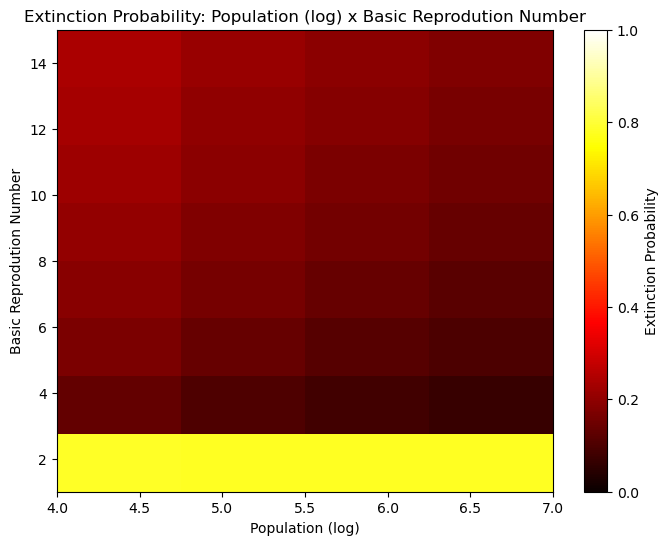

[[0.15756696 0.13725855 0.12257425 0.11022397]
 [0.25833448 0.23280951 0.21461117 0.19850227]
 [0.31395312 0.29015378 0.26983384 0.25157805]
 [0.35644253 0.32699554 0.30702119 0.29074639]]


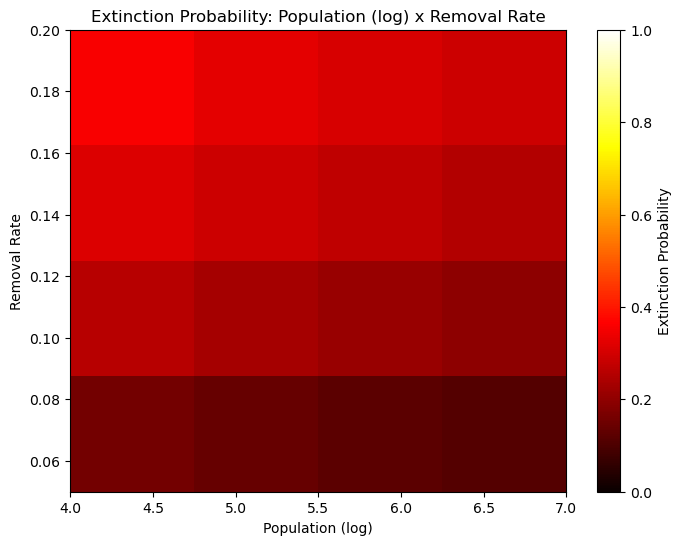

[[0.74394306 0.67594794 0.62009833 0.56807136]
 [0.17842602 0.14901131 0.13182358 0.12086593]
 [0.08886039 0.08757802 0.08749698 0.08749486]
 [0.07506763 0.07468011 0.07462156 0.07461853]]


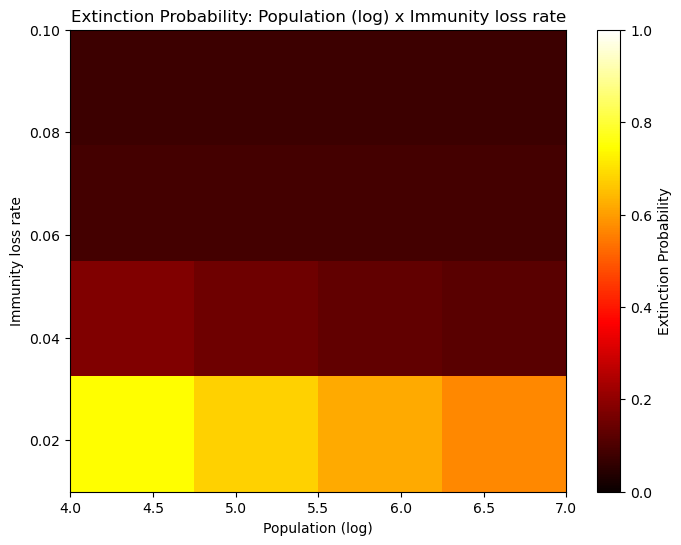

[[0.09306669 0.07387059 0.06881196 0.0688065 ]
 [0.1747524  0.14389413 0.12326716 0.10609906]
 [0.22506815 0.20175454 0.18061425 0.16115985]
 [0.25953895 0.2346275  0.21912603 0.20254147]
 [0.29007646 0.25864658 0.23401274 0.21535397]
 [0.29403351 0.27217206 0.25286702 0.2406738 ]
 [0.32013724 0.29403544 0.27351483 0.25428057]
 [0.34121424 0.3177473  0.29515323 0.27807684]
 [0.35934649 0.33598051 0.31613443 0.29712767]
 [0.37859362 0.35256723 0.33464381 0.3162262 ]]


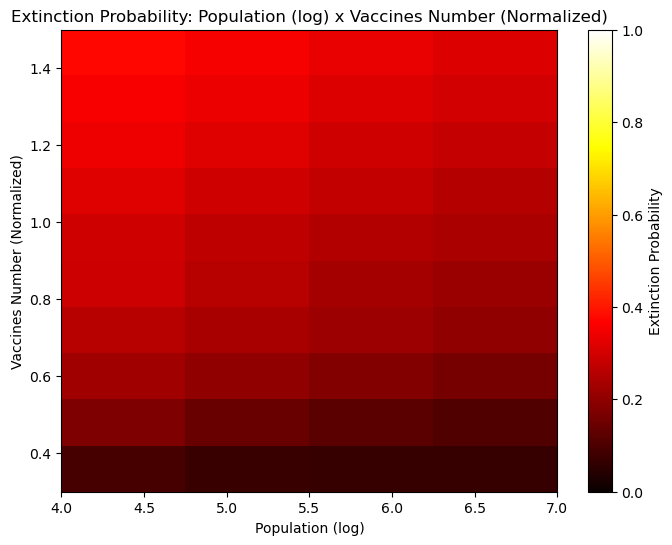

[[0.25147679 0.22407054 0.2026914  0.18663545]
 [0.27192464 0.24573378 0.22684988 0.20933069]
 [0.27596594 0.25097283 0.23240037 0.21735054]
 [0.27597109 0.25263941 0.23461263 0.21916481]
 [0.27505988 0.25199198 0.23514063 0.21936684]
 [0.27513115 0.25115696 0.23399123 0.21923307]
 [0.27549041 0.25106492 0.23388465 0.21825727]]


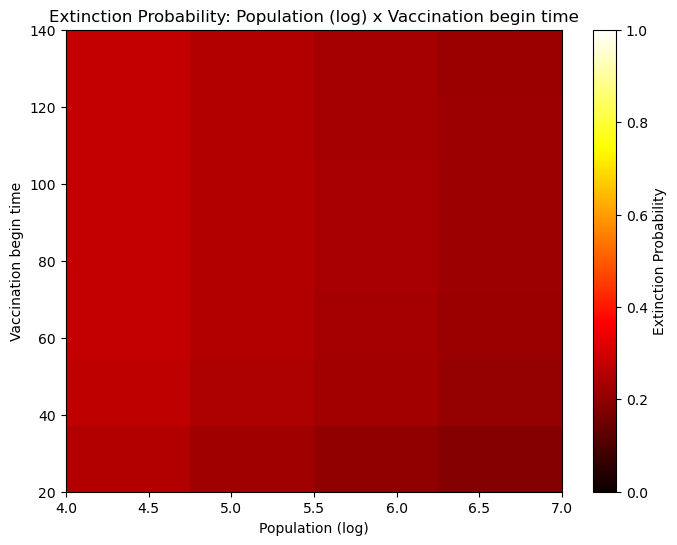

[[0.20891097 0.18521733 0.16358002 0.14442166]
 [0.25244523 0.23520331 0.21943459 0.20648708]
 [0.25668953 0.23989506 0.22622593 0.21322063]
 [0.25921504 0.24157142 0.22836169 0.21598166]
 [0.27846543 0.25043074 0.23216105 0.21744435]
 [0.29611347 0.26507811 0.24403441 0.22605044]
 [0.30027928 0.26952851 0.2473277  0.2289295 ]
 [0.30829528 0.27446947 0.25157964 0.23305929]]


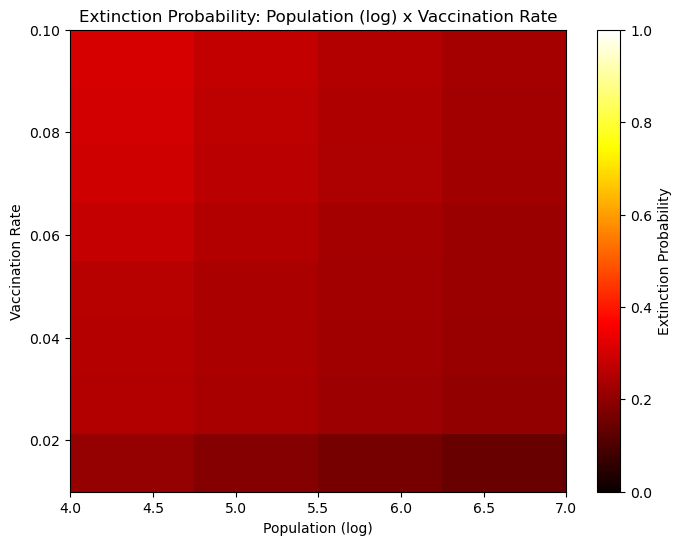

[[0.59870334 0.00622472 0.02648426 0.05172901 0.07160312 0.08874948
  0.10066523 0.1110883 ]
 [0.76868539 0.08049007 0.11778161 0.14268761 0.15855025 0.1703093
  0.18037974 0.18963091]
 [0.85290662 0.13508127 0.16945219 0.19084828 0.20728921 0.2203405
  0.23212712 0.24299238]
 [0.90074365 0.17199586 0.20535191 0.22699359 0.24465271 0.26144138
  0.27065285 0.28057936]]


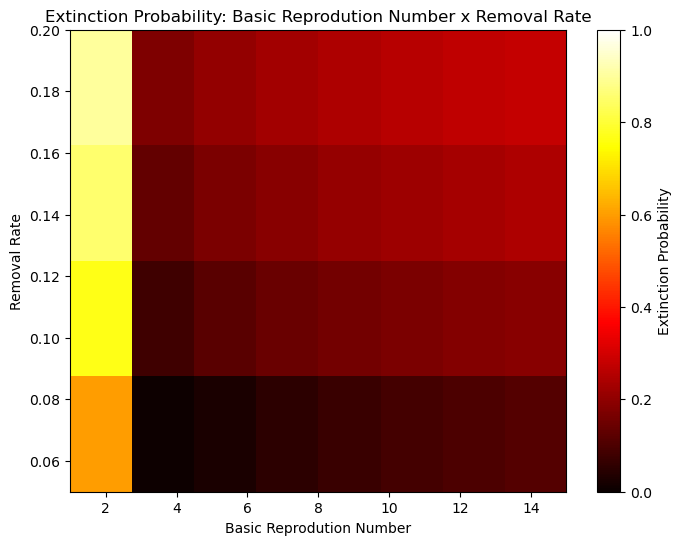

[[9.86048762e-01 3.90987623e-01 5.05804239e-01 5.83628948e-01
  6.36496801e-01 6.77285759e-01 7.05010069e-01 7.30859177e-01]
 [8.36291064e-01 2.80430305e-03 1.32657240e-02 2.86295471e-02
  4.55984903e-02 6.31879606e-02 7.81403061e-02 9.23362872e-02]
 [7.00723515e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.66935267e-04 6.74572657e-04 1.09548165e-03]
 [5.97975648e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


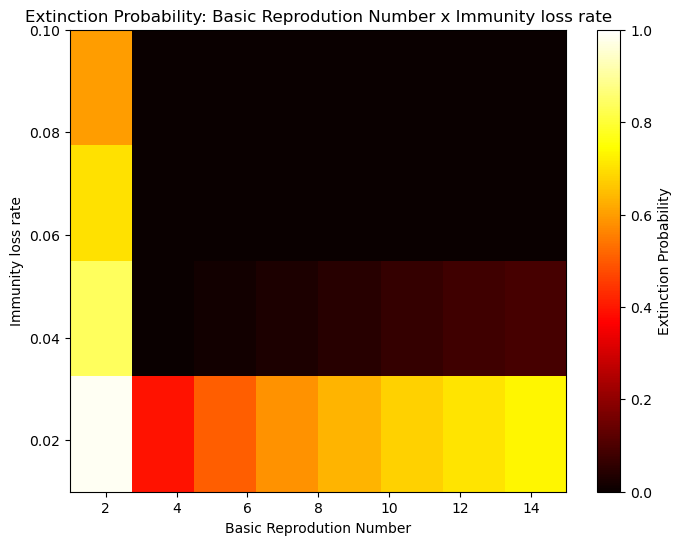

[[0.55225652 0.00176737 0.00136937 0.00201863 0.00417813 0.01018381
  0.01406186 0.02327581]
 [0.65332861 0.01281956 0.02345514 0.04268252 0.06369706 0.08505461
  0.10102537 0.11396261]
 [0.72358265 0.04073645 0.07614115 0.10771309 0.12964574 0.14383198
  0.15295894 0.16258358]
 [0.77509581 0.07984603 0.12324945 0.1471859  0.16352323 0.17338038
  0.18077467 0.18861245]
 [0.81411435 0.10782092 0.14048432 0.16165727 0.17268016 0.18678719
  0.19997704 0.21265823]
 [0.81409622 0.11760148 0.15796111 0.18217396 0.1938159  0.20753686
  0.2174501  0.22885713]
 [0.84439036 0.13406995 0.17255115 0.19381952 0.2104748  0.2290919
  0.24398757 0.25555092]
 [0.86839333 0.14938967 0.18999062 0.21485083 0.23945682 0.25587125
  0.26815789 0.27827281]
 [0.88771218 0.16595264 0.20596647 0.2377007  0.26007838 0.27589054
  0.28740126 0.29647604]
 [0.90347479 0.18776091 0.22421368 0.25764314 0.27829864 0.29435001
  0.3047777  0.31354284]]


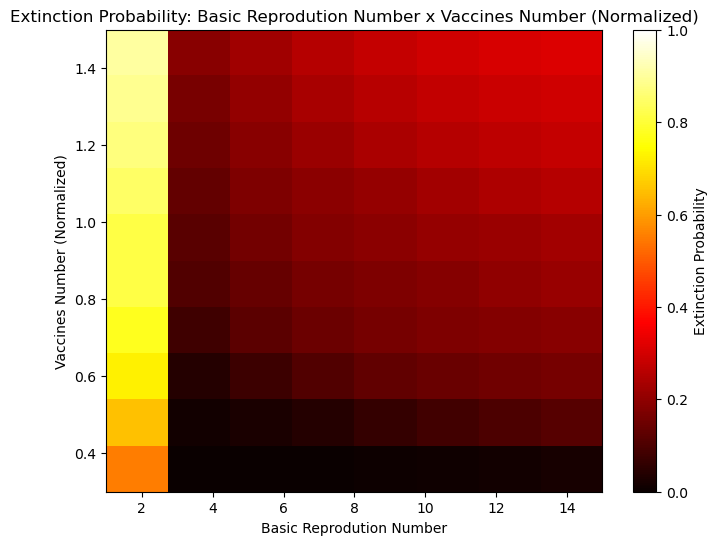

[[0.78021846 0.04999683 0.09480719 0.12904498 0.14876874 0.16458914
  0.17576401 0.18655901]
 [0.7802382  0.08696324 0.13431408 0.15334339 0.16834628 0.18397114
  0.19457785 0.20592381]
 [0.78025705 0.1124791  0.13649162 0.15397451 0.17287286 0.18859246
  0.19948656 0.20922521]
 [0.78024995 0.1168841  0.13280449 0.15804507 0.17630339 0.18983026
  0.2004707  0.21018793]
 [0.78026777 0.11130979 0.13517632 0.15961711 0.17603851 0.18993365
  0.20052318 0.21025235]
 [0.78028506 0.10560616 0.13789145 0.15898588 0.17577121 0.18983339
  0.20045839 0.21019328]
 [0.78030174 0.10589665 0.13688729 0.15844143 0.17556578 0.18972109
  0.20041296 0.21016757]]


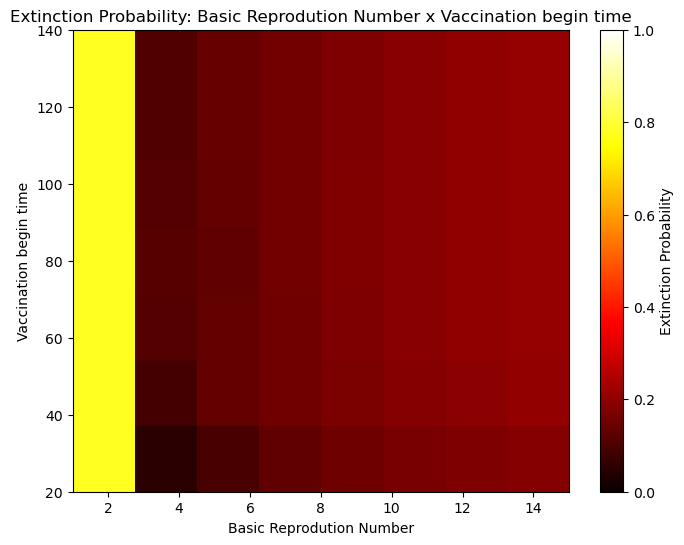

[[0.78028431 0.07681935 0.08226047 0.08589902 0.08967966 0.09345281
  0.09676173 0.09910259]
 [0.7802668  0.09718923 0.12512688 0.14352626 0.15669718 0.16695675
  0.17547814 0.18189916]
 [0.78026132 0.09860358 0.13046143 0.15055    0.16432504 0.17544654
  0.18326169 0.18915268]
 [0.78024775 0.0998347  0.13225001 0.15306368 0.16748204 0.17839021
  0.18601844 0.19297277]
 [0.78025696 0.1005219  0.13483661 0.15874461 0.1760405  0.19113998
  0.20180344 0.21365912]
 [0.78028557 0.10243783 0.13888134 0.16857625 0.19152591 0.2124888
  0.22701449 0.24134267]
 [0.78025616 0.10307158 0.14019205 0.17231086 0.19723748 0.21731507
  0.23348482 0.24826197]
 [0.78020529 0.10372911 0.14253476 0.17633562 0.20324247 0.22603246
  0.24270667 0.26002096]]


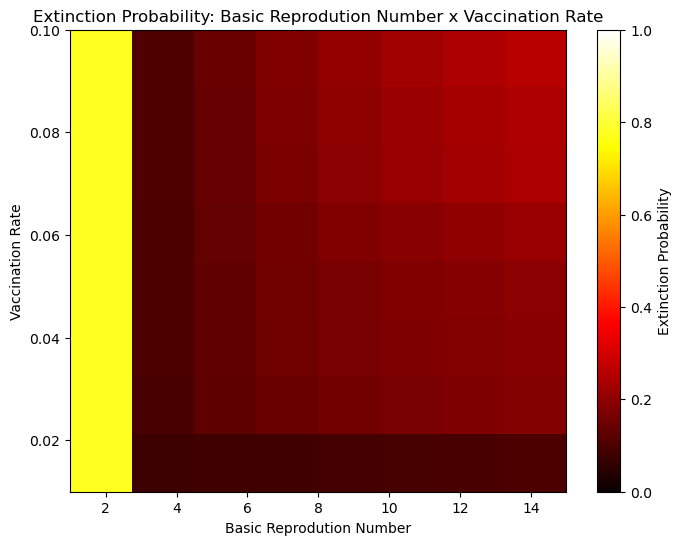

[[0.34739447 0.63648169 0.77426447 0.84992006]
 [0.07954446 0.1123438  0.16426105 0.22397753]
 [0.05680521 0.08501537 0.10000514 0.10960454]
 [0.04387959 0.07041657 0.08698813 0.09770353]]


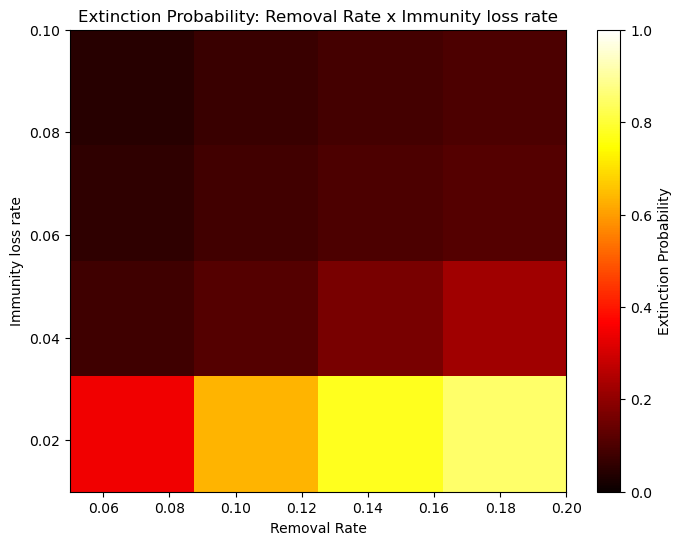

[[0.04452838 0.06538681 0.07979643 0.11484414]
 [0.05636329 0.0889901  0.16691424 0.2357451 ]
 [0.06523433 0.16002911 0.25056391 0.29276945]
 [0.08357428 0.22492636 0.28983701 0.31749631]
 [0.11711708 0.24290475 0.29749928 0.34056864]
 [0.1227694  0.27668075 0.31914276 0.34115347]
 [0.16339333 0.28554748 0.32886915 0.36415812]
 [0.19646723 0.29998495 0.34849982 0.3872396 ]
 [0.21910794 0.31449535 0.36885316 0.40613264]
 [0.23797611 0.33204871 0.38859819 0.42340784]]


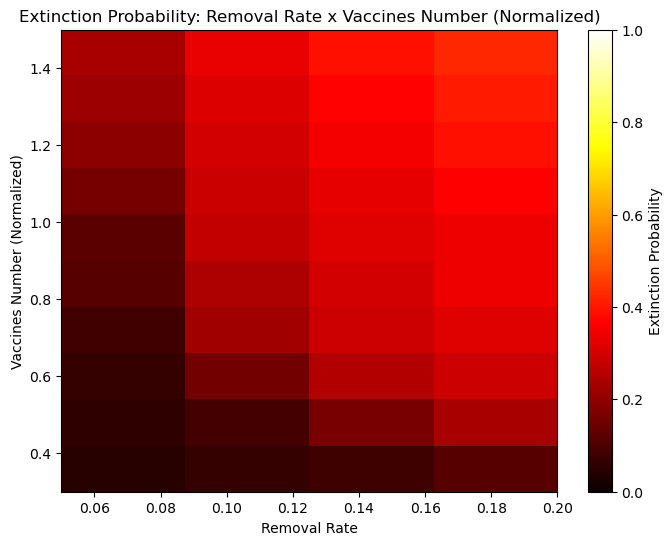

[[0.09232076 0.19094185 0.26458234 0.31702924]
 [0.11724416 0.22515196 0.28549827 0.32594462]
 [0.13506548 0.23236357 0.28686985 0.32239079]
 [0.14261518 0.2338614  0.28535025 0.3205611 ]
 [0.1451156  0.23409419 0.28344132 0.31890822]
 [0.14560762 0.23354579 0.28238528 0.31797372]
 [0.14537273 0.23249175 0.28153056 0.31930221]]


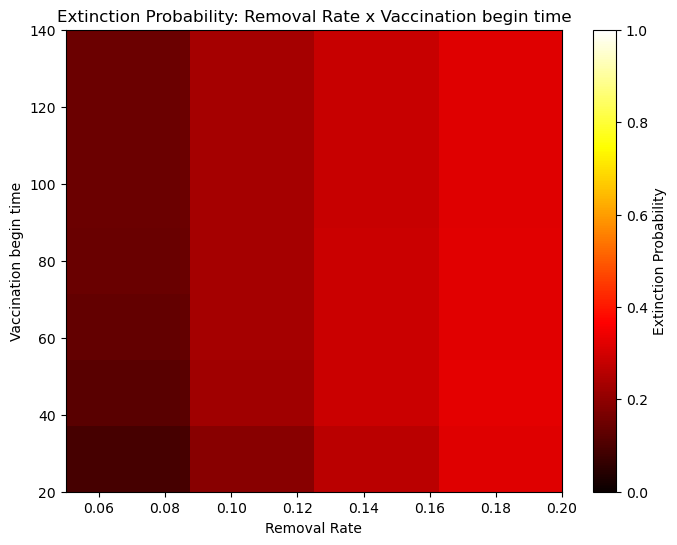

[[0.07591268 0.15199989 0.21874107 0.25547633]
 [0.1267885  0.22473817 0.26873488 0.29330866]
 [0.13531249 0.23053072 0.27317323 0.29701469]
 [0.13841406 0.23263468 0.27476116 0.29931991]
 [0.13987351 0.23329831 0.28171153 0.32361821]
 [0.14099923 0.23691258 0.30069259 0.35267204]
 [0.14114573 0.23885452 0.3066474  0.35941735]
 [0.14119983 0.24212747 0.31388136 0.37019501]]


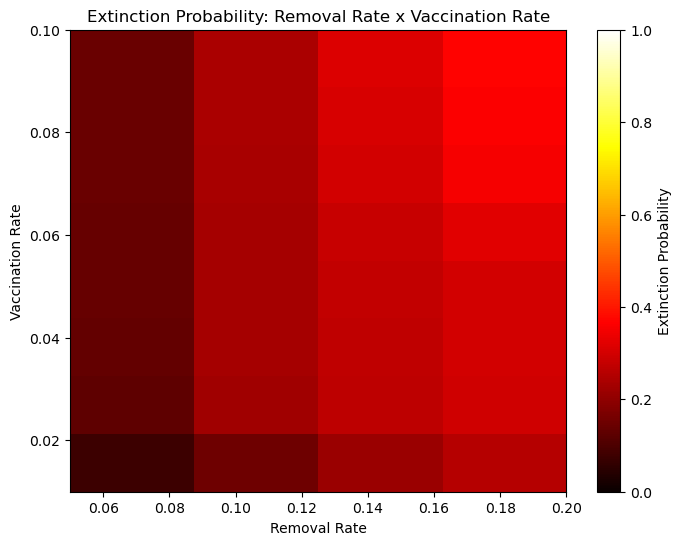

[[0.14447338 0.07184609 0.05002477 0.03821151]
 [0.34265976 0.08807542 0.06553934 0.05173822]
 [0.53016189 0.09846676 0.07722624 0.0627419 ]
 [0.65130618 0.10661376 0.08615352 0.0717605 ]
 [0.69890559 0.12693867 0.09305402 0.07919147]
 [0.76864442 0.11886387 0.09305056 0.07918753]
 [0.80832768 0.14984234 0.09845186 0.08534619]
 [0.85395121 0.18501944 0.10273492 0.09048604]
 [0.88489914 0.22213349 0.1067555  0.09480097]
 [0.91160841 0.26119431 0.11077997 0.09844817]]


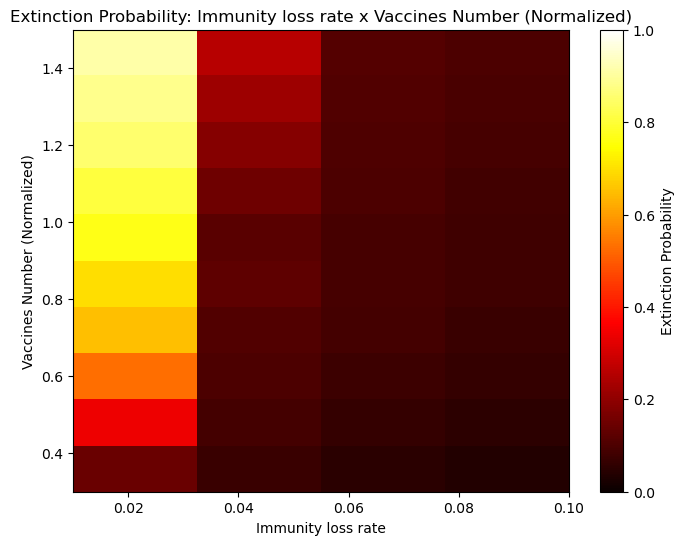

[[0.55783849 0.14444636 0.08785095 0.07473839]
 [0.6459168  0.14532755 0.08785275 0.07474189]
 [0.66905328 0.14503465 0.08785623 0.07474552]
 [0.67469378 0.14509337 0.08785554 0.07474525]
 [0.67383944 0.14511195 0.08785903 0.0747489 ]
 [0.67179699 0.14510038 0.08786249 0.07475255]
 [0.67096741 0.14510771 0.08786595 0.07475618]]


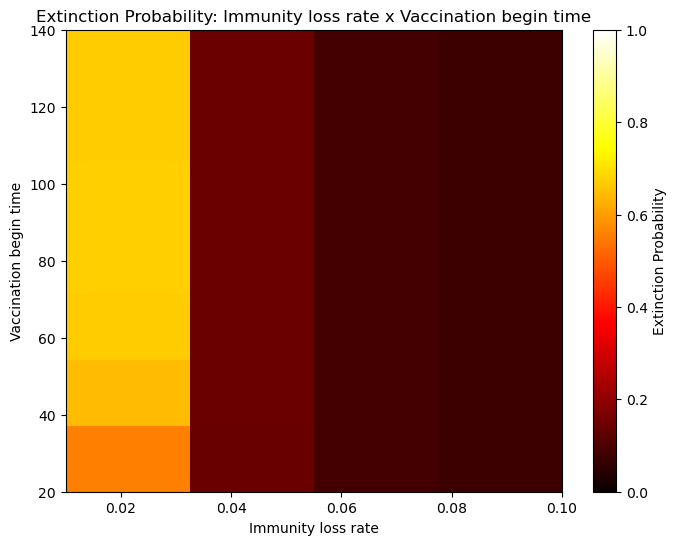

[[0.43524328 0.10453968 0.08759496 0.07475205]
 [0.6466932  0.10453734 0.08759154 0.07474813]
 [0.66915704 0.10453646 0.08759048 0.07474716]
 [0.67714274 0.10565379 0.08758847 0.07474481]
 [0.6803638  0.13580215 0.08758969 0.07474592]
 [0.68323149 0.18569977 0.08759442 0.07475074]
 [0.68373081 0.19999895 0.08758942 0.07474582]
 [0.68421512 0.21819541 0.09025375 0.07473939]]


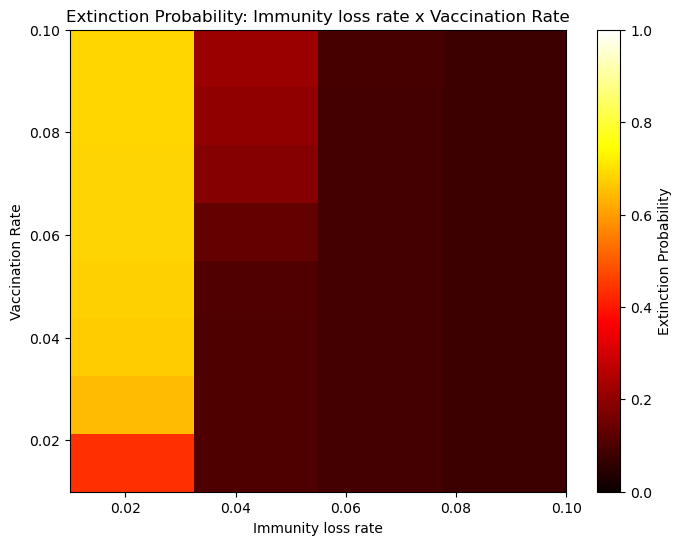

[[0.08059909 0.13380011 0.17216533 0.20097369 0.22077125 0.22756788
  0.24661113 0.26875178 0.29516468 0.32305189]
 [0.07748568 0.15038561 0.20353732 0.23022657 0.24472526 0.25797977
  0.27579304 0.29960591 0.31809053 0.33833514]
 [0.0748584  0.1367786  0.20308911 0.2392831  0.25517162 0.27295014
  0.29085978 0.31227534 0.32918051 0.34538823]
 [0.07527602 0.13450815 0.1940472  0.23821776 0.25929519 0.2772655
  0.29654245 0.31700359 0.3343461  0.35035422]
 [0.07484345 0.13453174 0.19040907 0.23340514 0.2574044  0.27567803
  0.29705137 0.31985817 0.3368515  0.35318949]
 [0.07495132 0.13439241 0.1905043  0.22994971 0.25537068 0.27258522
  0.29660929 0.31948274 0.33833142 0.35398232]
 [0.07495861 0.13462569 0.19129207 0.23065347 0.25391867 0.27052964
  0.29497708 0.31935777 0.33806618 0.3542527 ]]


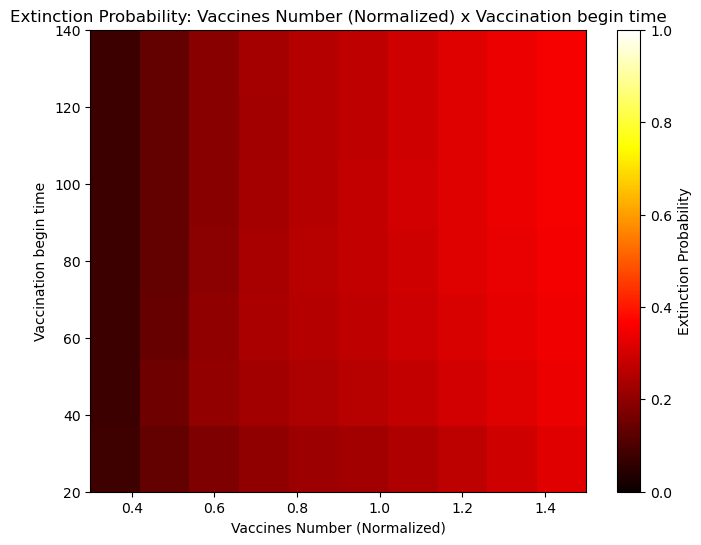

[[0.0691821  0.08749744 0.11600106 0.14930009 0.18594973 0.
  0.21627103 0.2373417  0.25225639 0.2659929 ]
 [0.07323751 0.12675757 0.18695886 0.22797841 0.         0.25529055
  0.2756368  0.29242262 0.30451879 0.31273186]
 [0.0752706  0.13820792 0.19710756 0.23513936 0.         0.26181978
  0.28236636 0.29633575 0.30600805 0.31381469]
 [0.0766629  0.14230323 0.20092222 0.23792642 0.26373194 0.26373546
  0.28385184 0.29751414 0.30636582 0.3172618 ]
 [0.07735917 0.14446208 0.20248926 0.23912048 0.         0.26429756
  0.28793958 0.30807306 0.32754531 0.35034201]
 [0.07814767 0.14665647 0.20393703 0.23971059 0.27066938 0.27073372
  0.30196806 0.33224513 0.35977613 0.38722933]
 [0.07825741 0.1472248  0.2044081  0.24059966 0.         0.27374252
  0.3068107  0.33902909 0.36859739 0.39497658]
 [0.07846144 0.14796266 0.20480864 0.24217288 0.2777387  0.
  0.31425592 0.34775824 0.38026294 0.40823684]]


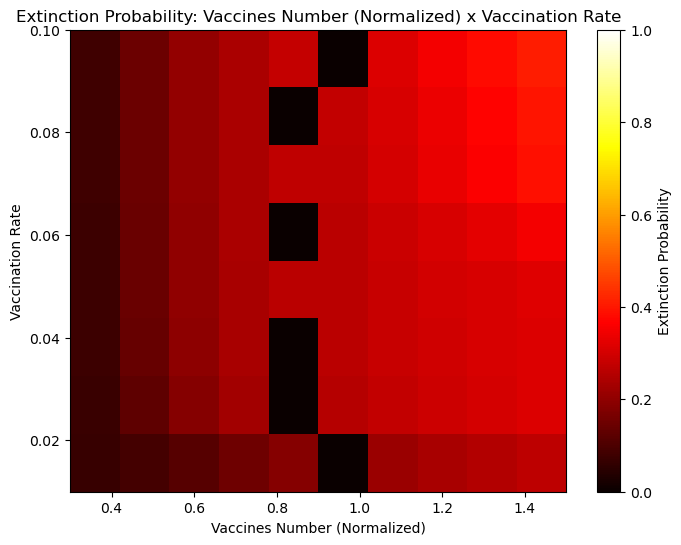

[[0.18244983 0.18054514 0.17555745 0.17404014 0.17220789 0.1716887
  0.17223829]
 [0.212086   0.22863107 0.23209123 0.23244381 0.23190094 0.23094749
  0.23064732]
 [0.21126401 0.23302175 0.23854074 0.2394078  0.23921266 0.23842431
  0.23818323]
 [0.21057106 0.23437161 0.24096125 0.24245489 0.24227945 0.2418328
  0.2415061 ]
 [0.21695644 0.24212502 0.24938817 0.25133621 0.25121966 0.25080179
  0.25055044]
 [0.22740241 0.25482048 0.26281099 0.26505759 0.26522915 0.2648494
  0.26456374]
 [0.22986686 0.25834959 0.2665947  0.2690189  0.2692895  0.26889512
  0.26859909]
 [0.23361539 0.26354075 0.27200743 0.27469805 0.27505049 0.27465924
  0.27438508]]


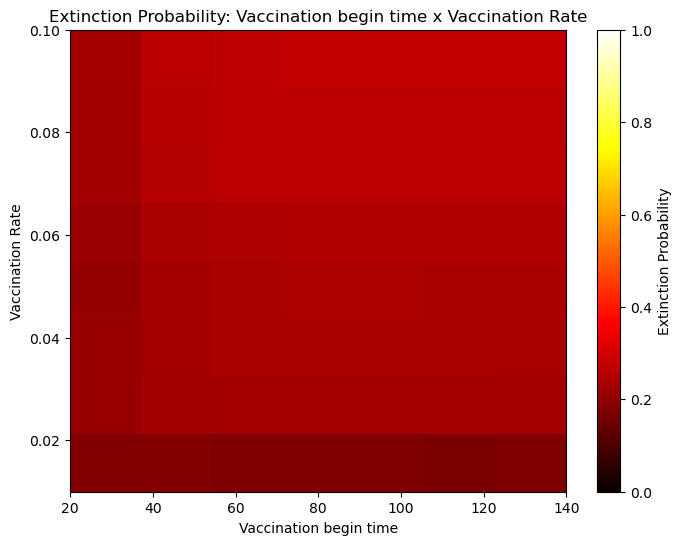

In [18]:
column_names = ['Population (log)', 'Basic Reprodution Number', 'Removal Rate', 'Immunity loss rate' ,
                'Vaccines Number (Normalized)', 'Vaccination begin time', 'Vaccination Rate']
for u in range(len(column_names)):
    for v in range(u+1, len(column_names)):
        m = column_names[u]
        n = column_names[v]
        x = minimo_infectados[m].values
        y = minimo_infectados[n].values
        z = minimo_infectados['Extinction Probability'].values
        x_unique = np.sort(minimo_infectados[m].unique())
        y_unique = np.sort(minimo_infectados[n].unique())
        # Criando uma matriz de zeros com dimensões baseadas em x e y
        Z = np.zeros((len(y_unique), len(x_unique)))
        # Preencher a matriz Z com os valores correspondentes
        for i, xi in enumerate(x_unique):
            for j, yj in enumerate(y_unique):
                mask = (minimo_infectados[m] == xi) & (minimo_infectados[n] == yj)
                if mask.any():
                    Z[j, i] = minimo_infectados.loc[mask, 'Extinction Probability'].values.mean()
        print(Z)
            # Criar o gráfico de mapa de calor
        plt.figure(figsize=(8, 6))
        plt.imshow(Z, aspect='auto', origin='lower', cmap='hot', extent=[x.min(), x.max(), y.min(), y.max()], vmin=0, vmax=1)
        plt.colorbar(label="Extinction Probability")
        plt.xlabel(m)
        plt.ylabel(n)
        plt.title(f"Extinction Probability: {m} x {n}")
        plt.show()